#       DECISION TREE CLASSIFIER

In [1]:
from scipy.io import savemat, loadmat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

In [2]:
#Loading training,test data .mat files
mat_train = loadmat('2010rainfall.mat')
mat_test = loadmat('2011rainfall.mat')

## STEP 1: ACCESS THE VARIABLES

In [3]:
#Accessing training data
X_train = mat_train['XR1']
Z_train = mat_train['ZR1']

#Accessing test data
X_test = mat_test['XR']
Z_test = mat_test['ZR']

## STEP 2: LINEAR REGRESSION

In [4]:
#Generates the predictor vector for given space-time coordinate
def generateRegressionVector(X, s, t):
    return np.append(np.delete(X[:, t], s), [X[s, t-1] if t > 0 else 0, X[s, t-2] if t > 1 else 0])

In [5]:
#Generating feature Matrix and corresponding output vector for training
predictors = list()
output = list()

S, T = X_train.shape
for s in range(S):
    for t in range(T):
        predictors.append(generateRegressionVector(X_train, s, t))
        output.append(X_train[s, t])
        
predictors = np.array(predictors)
output = np.array(output)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [7]:
#fit Linear Regressor
model = regressor.fit(predictors, output)

## STEP 3: PREDICT RAINFALL

### s = 42 (MUMBAI)

In [8]:
predicted_output = np.array([model.predict(np.array([generateRegressionVector(X_test, 42, t)]))[0] for t in range(T)])
original_output = X_test[42, :]

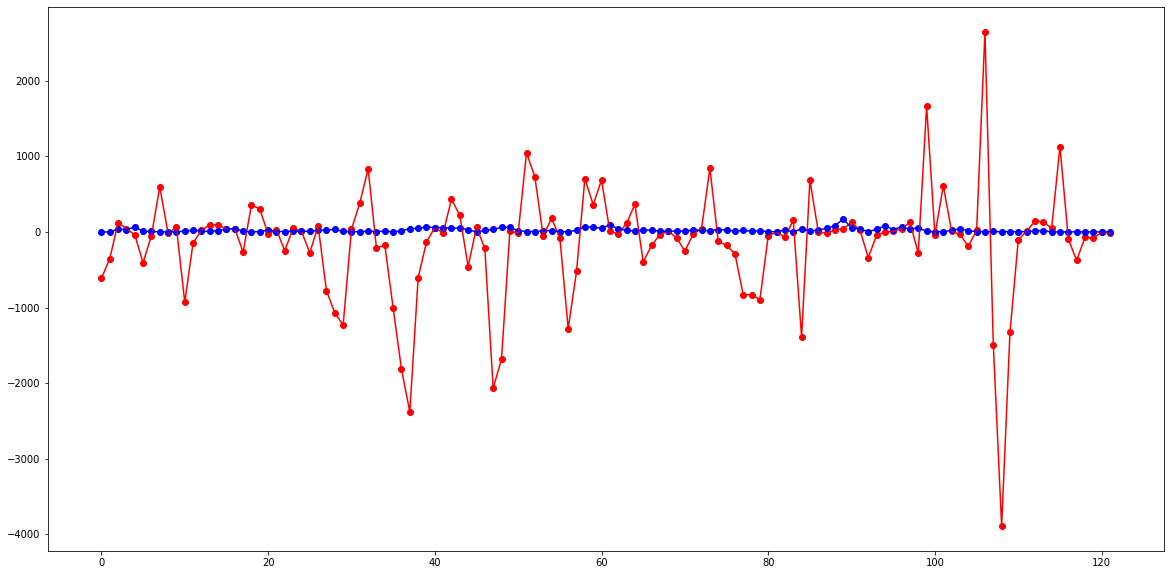

In [9]:
figure(figsize=(20, 10))
plt.scatter(np.arange(T), predicted_output, c=['#ff0000'])
plt.scatter(np.arange(T), original_output, c=['#0000ff'])
plt.plot(np.arange(T), predicted_output, 'r')
plt.plot(np.arange(T), original_output, 'b')

In [10]:
rmse = np.sqrt(((predicted_output - original_output)**2).mean())
rmse

740.7647443721437

### s=158 (DELHI)

In [11]:
predicted_output = np.array([model.predict(np.array([generateRegressionVector(X_test, 158, t)]))[0] for t in range(T)])
original_output = X_test[158, :]

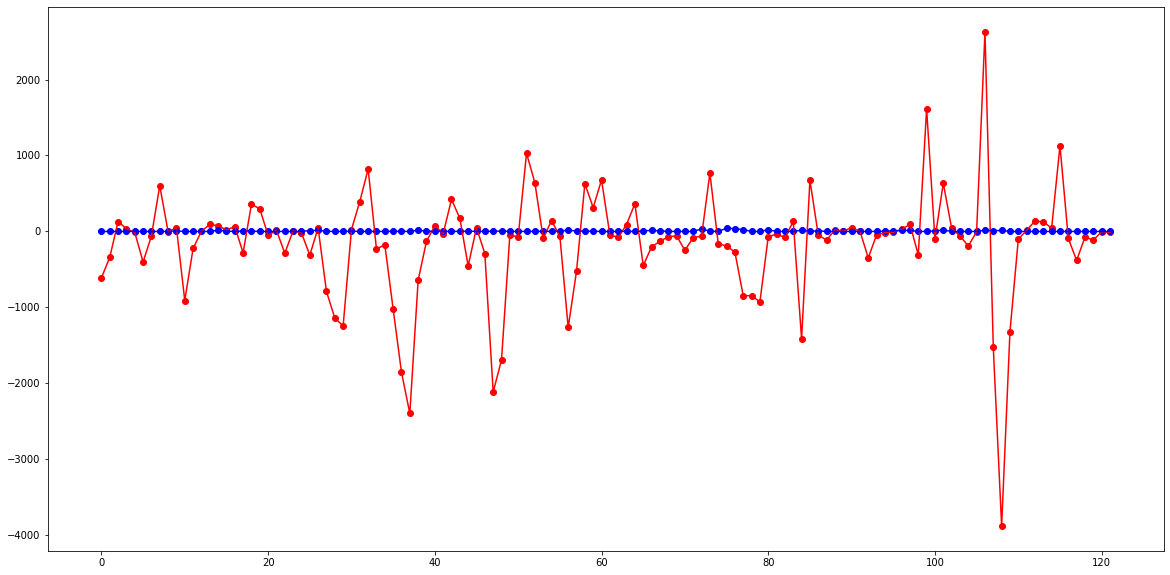

In [12]:
figure(figsize=(20, 10))
plt.scatter(np.arange(T), predicted_output, c=['#ff0000'])
plt.scatter(np.arange(T), original_output, c=['#0000ff'])
plt.plot(np.arange(T), predicted_output, 'r')
plt.plot(np.arange(T), original_output, 'b')

In [13]:
rmse = np.sqrt(((predicted_output - original_output)**2).mean())
rmse

739.5645501001064

### s= 299 (KHARAGPGUR) 

In [14]:
predicted_output = np.array([model.predict(np.array([generateRegressionVector(X_test, 299, t)]))[0] for t in range(T)])
original_output = X_test[299, :]

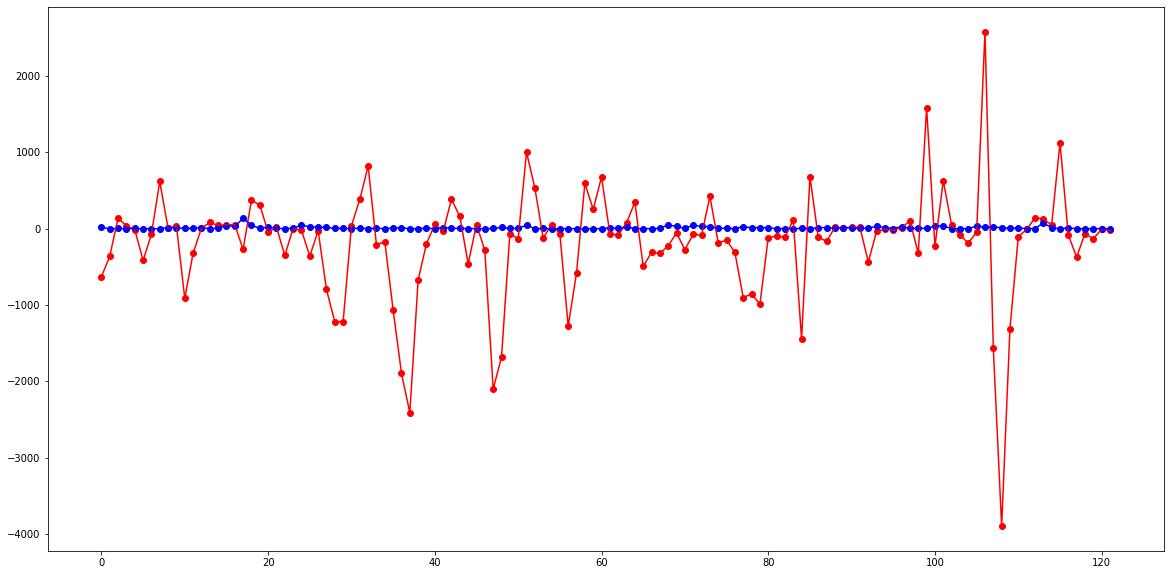

In [15]:
figure(figsize=(20, 10))
plt.scatter(np.arange(T), predicted_output, c=['#ff0000'])
plt.scatter(np.arange(T), original_output, c=['#0000ff'])
plt.plot(np.arange(T), predicted_output, 'r')
plt.plot(np.arange(T), original_output, 'b')

In [16]:
rmse = np.sqrt(((predicted_output - original_output)**2).mean())
rmse

743.367489252501

### STEP 4: LASSO REGRESSION

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 41.0)

In [18]:
#fit lasso regressor
lasso.fit(predictors, output)

Lasso(alpha=41.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
c = lasso.coef_
print ('Top 5 features:')
for i in range(S):
    if (c[i] != 0):
        print (i)

Top 5 features:
38
41
58
188
356


### s = 42 (MUMBAI)

In [20]:
predicted_output = np.array([lasso.predict(np.array([generateRegressionVector(X_test, 42, t)]))[0] for t in range(T)])
original_output = X_test[42, :]

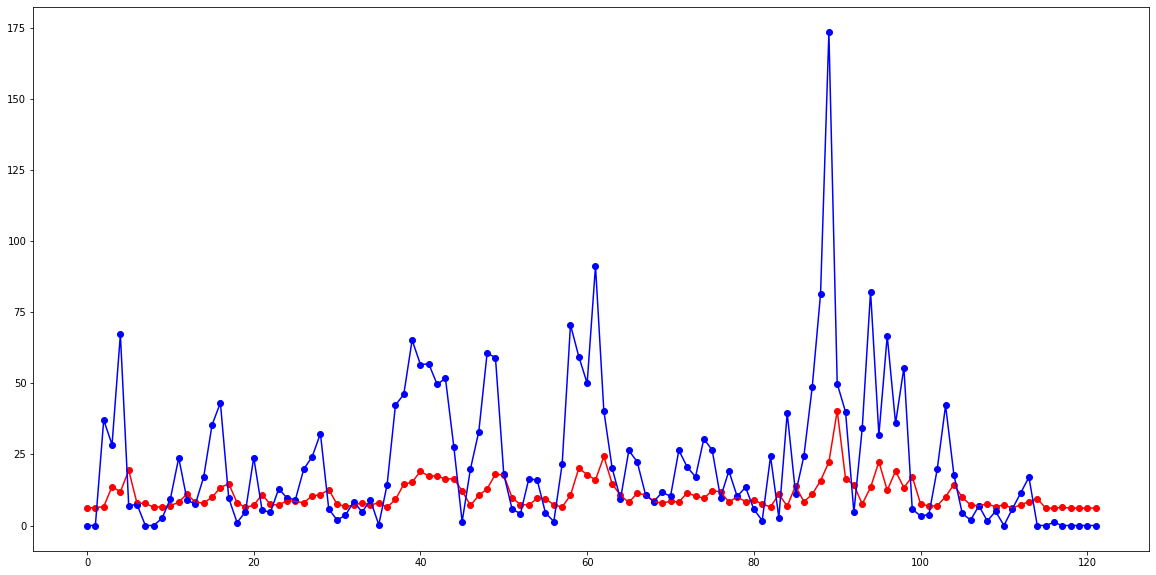

In [21]:
figure(figsize=(20, 10))
plt.scatter(np.arange(T), predicted_output, c=['#ff0000'])
plt.scatter(np.arange(T), original_output, c=['#0000ff'])
plt.plot(np.arange(T), predicted_output, 'r')
plt.plot(np.arange(T), original_output, 'b')

In [22]:
rmse = np.sqrt(((predicted_output - original_output)**2).mean())
rmse

25.710058317965633

### s=158 (DELHI)

In [23]:
predicted_output = np.array([lasso.predict(np.array([generateRegressionVector(X_test, 158, t)]))[0] for t in range(T)])
original_output = X_test[158, :]

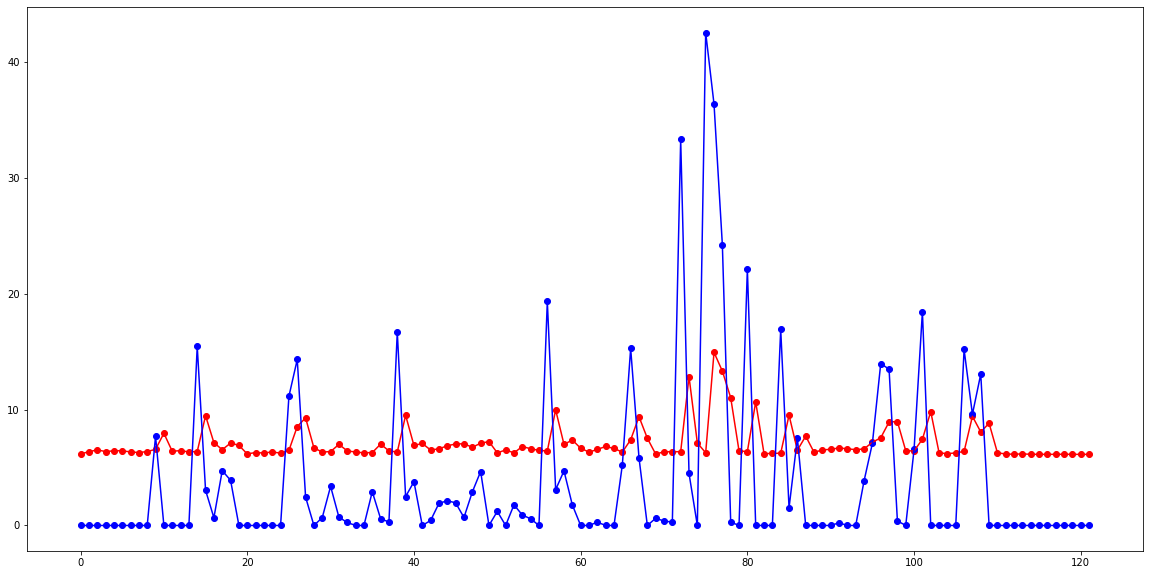

In [24]:
figure(figsize=(20, 10))
plt.scatter(np.arange(T), predicted_output, c=['#ff0000'])
plt.scatter(np.arange(T), original_output, c=['#0000ff'])
plt.plot(np.arange(T), predicted_output, 'r')
plt.plot(np.arange(T), original_output, 'b')

In [25]:
rmse = np.sqrt(((predicted_output - original_output)**2).mean())
rmse

7.957532544244021

### s = 299 (KHARAGPUR)

In [26]:
predicted_output = np.array([lasso.predict(np.array([generateRegressionVector(X_test, 299, t)]))[0] for t in range(T)])
original_output = X_test[299, :]

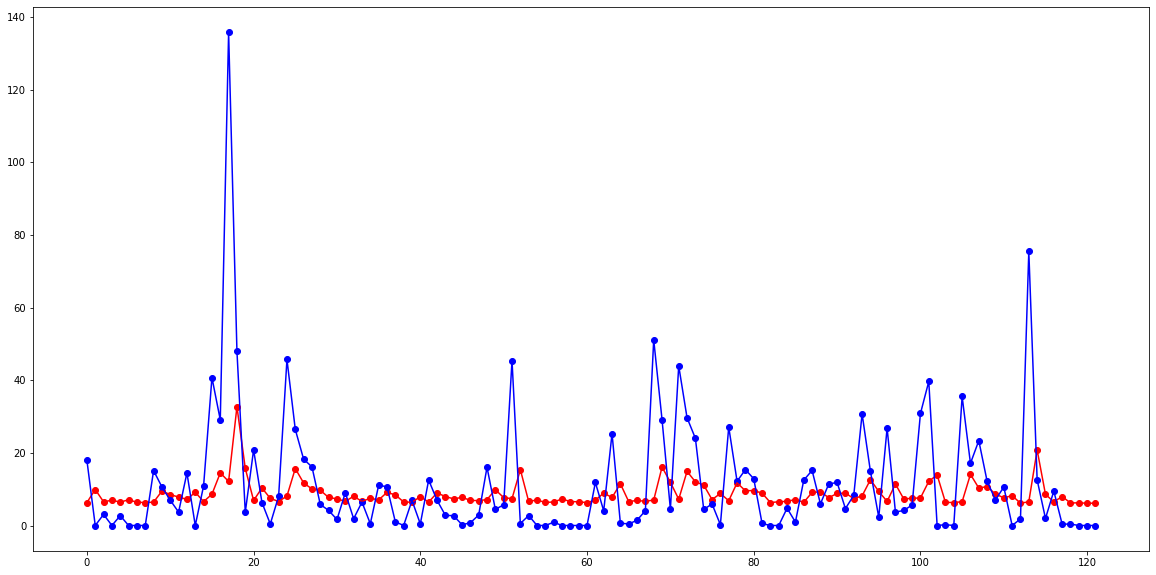

In [27]:
figure(figsize=(20, 10))
plt.scatter(np.arange(T), predicted_output, c=['#ff0000'])
plt.scatter(np.arange(T), original_output, c=['#0000ff'])
plt.plot(np.arange(T), predicted_output, 'r')
plt.plot(np.arange(T), original_output, 'b')

In [28]:
rmse = np.sqrt(((predicted_output - original_output)**2).mean())
rmse

17.234431223132976

# STEP-5: DECISION TREE CLASSIFIER


In [29]:
#Fitting decision tree classifier on training set
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train.T, Z_train.T)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

[Text(195.3, 195.696, 'X[184] <= 6.156\ngini = 0.395\nsamples = 122\nvalue = [89, 33]'),
 Text(122.76, 152.208, 'X[252] <= 2.67\ngini = 0.259\nsamples = 98\nvalue = [83, 15]'),
 Text(66.96000000000001, 108.72, 'X[159] <= 33.952\ngini = 0.079\nsamples = 73\nvalue = [70, 3]'),
 Text(44.64, 65.232, 'X[348] <= 77.8\ngini = 0.028\nsamples = 71\nvalue = [70, 1]'),
 Text(22.32, 21.744, 'gini = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(89.28, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(178.56, 108.72, 'X[26] <= 17.168\ngini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(133.92000000000002, 65.232, 'X[204] <= 30.413\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(111.6, 21.744, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(156.24, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(223.2, 65.232, 'X[201] <= 24.824\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(200.88, 21.744, 'gi

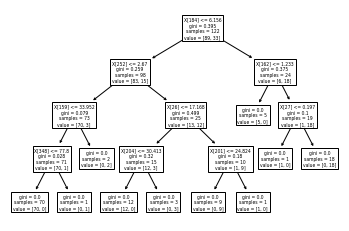

In [30]:
tree.plot_tree(tree_clf) 

Important features observing the tree:

  Features X[184], X[252], X[159], X[348], X[26], X[204], X[201], X[162], X[27] are the discriminative features which led to leaf nodes with zero entropy

In [31]:
#Important features using library function
X = pd.DataFrame(X_train.T)
for importance, name in sorted(zip(tree_clf.feature_importances_, X.columns),reverse=True)[:10]:
    print (name, importance)

184 0.2853599049425696
252 0.14901568099219764
162 0.1475727111445621
26 0.1221246169560776
204 0.09969356486210416
159 0.07854178207992646
348 0.040953929227390225
27 0.039352722971883254
201 0.03738508682328908
356 0.0


# STEP-6: TESTING DECISION TREE 

In [32]:
#Predicted output from Decisiontree classifier
pred = tree_clf.predict(X_test.T)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

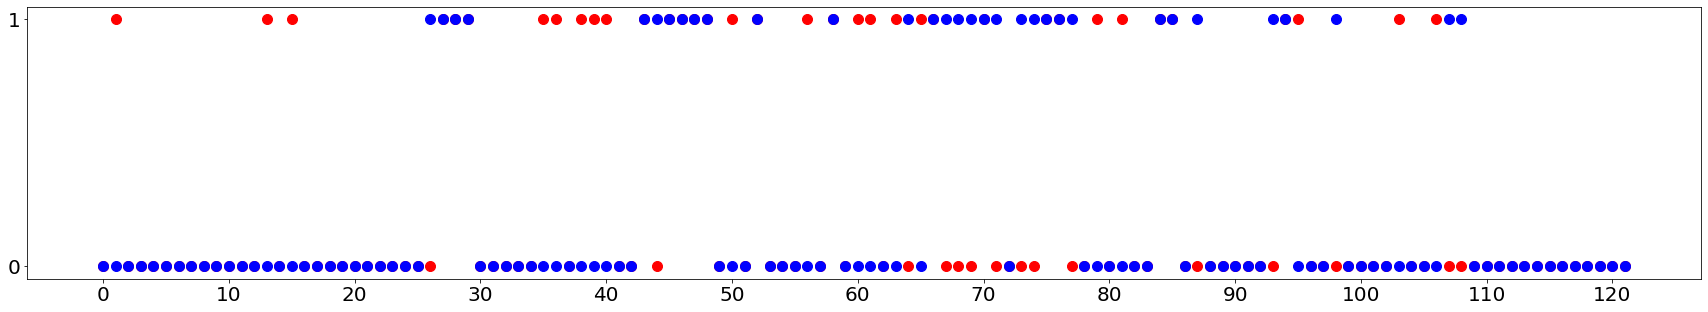

In [33]:
#Plotting predicted and actual outputs
figure(figsize=(30, 5))
x = np.arange(T)
plt.yticks([0, 1], [0, 1], fontsize = 20)
plt.xticks([10*x for x in range(13)], [10*x for x in range(13)], fontsize = 20)
plt.plot(x, pred,'r.',x, Z_test.T,'b.', markersize=20)

In [34]:
#Calculating accuracy
def Accuracy(Z_test,pred):
    count = 0
    for i in range(T):
        if(Z_test.T[i] == pred[i]):
            count += 1
    return (count/T)*100
print ('Accuracy for the classifier :',Accuracy(Z_test,pred))

Accuracy for the classifier : 72.1311475409836
